In [33]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [34]:
import numpy as np
import math
from domain import (
    H_eps,
    H_eps_derivative,
    EPS,
    gradient_descent,
    grad_phi_part,
    grad_w_part,
    get_frontier_phi,
)
from scipy.ndimage.interpolation import shift
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from segmenter import Segmenter

<IPython.core.display.Javascript object>

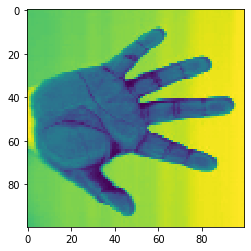

<IPython.core.display.Javascript object>

In [46]:
from PIL import Image

img = Image.open("../data/test/src_hand.jpg").convert("L")
img = img.resize((100, 100))
img = np.array(img)
mean = np.mean(img)
std = np.std(img)
img = (img - mean) / std
plt.imshow(img)

In [47]:
test = np.random.uniform(-1, 1, img.shape)

<IPython.core.display.Javascript object>

In [48]:
optimiser_param = {
    "u": img,
    "step_w": 0.1,
    "step_phi": 1,
    "eps": 10,
    "lambda_": 0.5,
    "mu": 0.5,
    "it": 25,
    "verbose": True,
    "mode": "standard",
    "test": test,
}

<IPython.core.display.Javascript object>

In [49]:
segmenter = Segmenter(optimiser_param)

<IPython.core.display.Javascript object>

In [50]:
segmenter.segment()

itération 0/25
1004
itération 0 : w gradient: 62.12190240689528
itération 0 : phi gradient: 741.4479110227962
itération 0 munford_shah functional: 40992.297580626844
itération 1/25
919
itération 1 : w gradient: 34.36827428047522
itération 1 : phi gradient: 951.9476850055195
itération 1 munford_shah functional: 40380.35821826474
itération 2/25
881
itération 2 : w gradient: 22.52152457773734
itération 2 : phi gradient: 137.27081498407992
itération 2 munford_shah functional: 39965.50774549522
itération 3/25
866
itération 3 : w gradient: 16.556829662857076
itération 3 : phi gradient: 71.07261564497739
itération 3 munford_shah functional: 39658.61496022774
itération 4/25
857
itération 4 : w gradient: 12.09367960122573
itération 4 : phi gradient: 42.66251398611577
itération 4 munford_shah functional: 39424.014695654194
itération 5/25
854
itération 5 : w gradient: 9.28141308946659
itération 5 : phi gradient: 27.158199433263864
itération 5 munford_shah functional: 39235.62240266978
itération 6

<IPython.core.display.Javascript object>

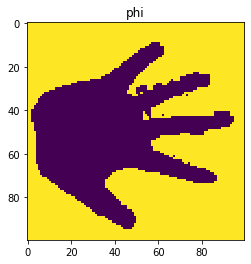

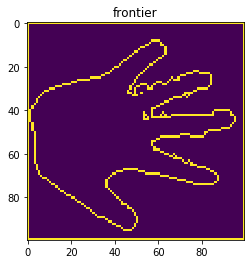

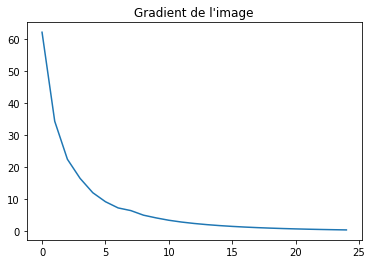

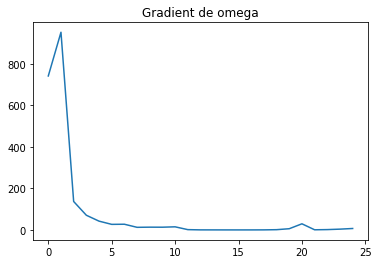

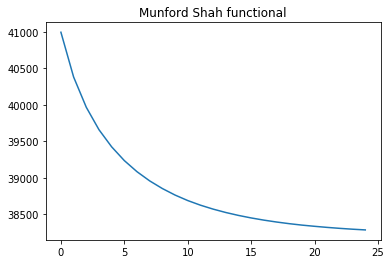

<IPython.core.display.Javascript object>

In [51]:
segmenter.plot_stats()